<a href="https://colab.research.google.com/github/annshita/IoT-Anomaly-Detection/blob/main/IoT_Anomaly_Detection_IoT_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DECISION TREE**

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [ ]:
filepath = "cleaned_data.csv"

In [ ]:
df = pd.read_csv(filepath)

In [ ]:
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0.003497,0,0,0,5,212,3,144,Benign,0,...,0,0,0,0,0,0,0,1,0,0
1,0.036724,34,311,0,1,62,1,339,Benign,0,...,0,0,0,0,0,0,0,1,0,0
2,384.518261,15072,0,0,48,16416,0,0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
3,0.270332,48,48,0,1,76,1,76,Benign,0,...,0,0,0,0,0,0,0,1,0,0
4,0.111429,48,48,0,1,76,1,76,Benign,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47998,16.002137,212,0,0,2,268,0,0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
47999,32.008281,318,0,0,3,402,0,0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
48000,47.719591,385,0,0,4,497,0,0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
48001,32.008033,318,0,0,3,402,0,0,Benign,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df.shape

(48003, 25)

In [ ]:
df['label'].value_counts()

,count
label,
Benign,26001
PartOfAHorizontalPortScan,12369
C&C,5618
Attack,3814
Okiru,163
DDoS,36
FileDownload,2


In [ ]:
DT = DecisionTreeClassifier()

In [ ]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = df['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

In [ ]:
start = time.time()
print('program start...')
print()

DT.fit(X_train, Y_train)
print()

print('prediction:')
y_pred = DT.predict(X_test)
print(y_pred)
print()

print('Score:')
score = DT.score(X_test,Y_test)
print(score)

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


prediction:
['Benign' 'PartOfAHorizontalPortScan' 'Benign' ... 'Benign'
 'PartOfAHorizontalPortScan' 'Benign']

Score:
0.8081449848974065
program end...

time cost: 
0.32267212867736816 seconds


In [ ]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

Classifiction Report :
                           precision    recall  f1-score   support

                   Attack       1.00      0.99      0.99       754
                   Benign       0.82      0.83      0.83      5169
                      C&C       0.35      0.32      0.34      1146
                     DDoS       1.00      0.50      0.67         8
                    Okiru       0.66      0.72      0.69        32
PartOfAHorizontalPortScan       0.93      0.92      0.93      2492

                 accuracy                           0.81      9601
                macro avg       0.79      0.72      0.74      9601
             weighted avg       0.81      0.81      0.81      9601



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.8050732653886599
Recall: 0.8081449848974065
F1 Score: 0.8064418087886137


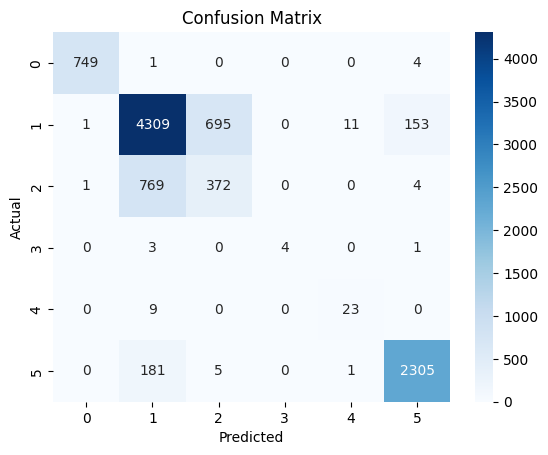

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**NAIVE BAYES**

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np

In [ ]:
filepath = "cleaned_data.csv"

In [ ]:
df = pd.read_csv(filepath)

In [ ]:
df.shape

(48003, 25)

In [ ]:
df['label'].value_counts()

,count
label,
Benign,26001
PartOfAHorizontalPortScan,12369
C&C,5618
Attack,3814
Okiru,163
DDoS,36
FileDownload,2


In [ ]:
for col in df.columns:
    print(col)

duration
orig_bytes
resp_bytes
missed_bytes
orig_pkts
orig_ip_bytes
resp_pkts
resp_ip_bytes
label
proto_icmp
proto_tcp
proto_udp
conn_state_OTH
conn_state_REJ
conn_state_RSTO
conn_state_RSTOS0
conn_state_RSTR
conn_state_RSTRH
conn_state_S0
conn_state_S1
conn_state_S2
conn_state_S3
conn_state_SF
conn_state_SH
conn_state_SHR


In [ ]:
print(df.columns.tolist())

['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']


In [ ]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = df['label']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
normalized_x = scaler.transform(X)
normalized_x

array([[4.43554718e-08, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.65802215e-07, 1.94861339e-08, 9.24175004e-07, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.87717726e-03, 8.63808855e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.05268793e-04, 2.20651811e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.05985532e-04, 1.82252664e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.02965933e-04, 1.21501776e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_x, Y, random_state=100, test_size=0.2)

In [ ]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [ ]:
start = time.time()
print('program start...')
print()

clf = GaussianNB().fit(X_train, Y_train)
print()
print(clf.score(X_test, Y_test))
print()

y_pred = clf.fit(X_train, Y_train).predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


0.2332048744922404

['C&C' 'Okiru' 'Okiru' ... 'C&C' 'Okiru' 'Okiru']

program end...

time cost: 
0.19773554801940918 seconds


In [ ]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred, zero_division=0))

Classifiction Report :
                           precision    recall  f1-score   support

                   Attack       0.73      1.00      0.85       741
                   Benign       1.00      0.21      0.35      5254
                      C&C       0.55      0.31      0.40      1091
                     DDoS       0.04      0.89      0.07         9
             FileDownload       0.00      0.00      0.00         0
                    Okiru       0.01      0.97      0.01        39
PartOfAHorizontalPortScan       0.00      0.00      0.00      2467

                 accuracy                           0.23      9601
                macro avg       0.33      0.48      0.24      9601
             weighted avg       0.66      0.23      0.30      9601



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(Y_test, y_pred, average='weighted')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.6647702687103464
Recall: 0.2332048744922404
F1 Score: 0.3020382101154078


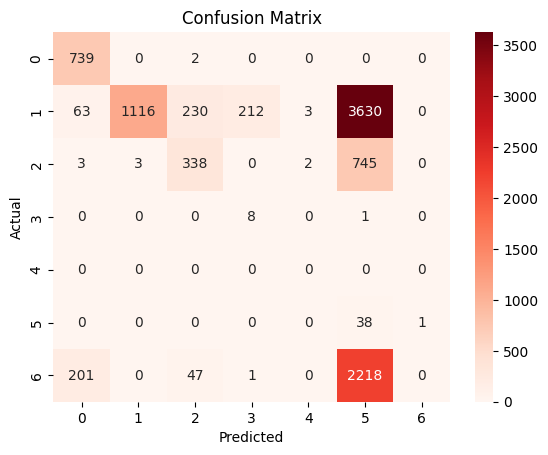

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**SUPPORT VECTOR MACHINE (SVM)**

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np

In [ ]:
filepath = "cleaned_data.csv"

In [ ]:
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0.003497,0,0,0,5,212,3,144,Benign,0,...,0,0,0,0,0,0,0,1,0,0
1,0.036724,34,311,0,1,62,1,339,Benign,0,...,0,0,0,0,0,0,0,1,0,0
2,384.518261,15072,0,0,48,16416,0,0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
3,0.270332,48,48,0,1,76,1,76,Benign,0,...,0,0,0,0,0,0,0,1,0,0
4,0.111429,48,48,0,1,76,1,76,Benign,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47998,16.002137,212,0,0,2,268,0,0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
47999,32.008281,318,0,0,3,402,0,0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
48000,47.719591,385,0,0,4,497,0,0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
48001,32.008033,318,0,0,3,402,0,0,Benign,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = df['label']

In [ ]:
SVM_classifier = SVC()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

In [ ]:
start = time.time()
print('program start...')
print()

SVM_classifier = SVC(C=1.0, cache_size=1500, verbose=True).fit(X_train, Y_train)
print()
print(SVM_classifier.score(X_test, Y_test))
print()

y_pred = SVM_classifier.predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

[LibSVM]
0.5387980418706385

['Benign' 'Benign' 'Benign' ... 'Benign' 'Benign' 'Benign']

program end...

time cost: 
149.97775030136108 seconds


In [ ]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred, zero_division=0))

Classifiction Report :
                           precision    recall  f1-score   support

                   Attack       0.00      0.00      0.00       754
                   Benign       0.54      1.00      0.70      5169
                      C&C       0.00      0.00      0.00      1146
                     DDoS       1.00      0.50      0.67         8
                    Okiru       0.00      0.00      0.00        32
PartOfAHorizontalPortScan       0.00      0.00      0.00      2492

                 accuracy                           0.54      9601
                macro avg       0.26      0.25      0.23      9601
             weighted avg       0.29      0.54      0.38      9601



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.29080860891620025
Recall: 0.5387980418706385
F1 Score: 0.37748812030463835


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


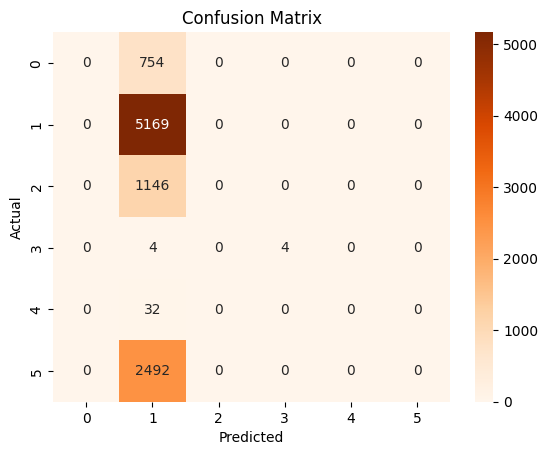

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('cleaned_data.csv')

In [ ]:
X = data[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

In [ ]:
y=data['label']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                            precision    recall  f1-score   support

                   Attack       0.74      1.00      0.85       782
                   Benign       0.62      0.95      0.75      5158
                      C&C       0.65      0.29      0.40      1126
                     DDoS       1.00      0.33      0.50         6
                    Okiru       0.00      0.00      0.00        34
PartOfAHorizontalPortScan       0.46      0.02      0.04      2495

                 accuracy                           0.63      9601
                macro avg       0.58      0.43      0.42      9601
             weighted avg       0.59      0.63      0.53      9601



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.5888517670404352
Recall: 0.6298302260181231
F1 Score: 0.5281366195655767


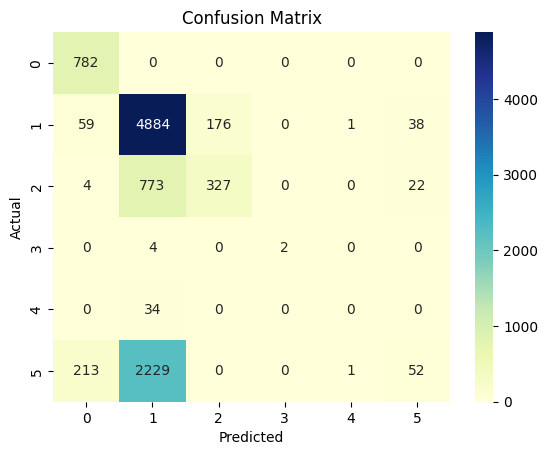

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

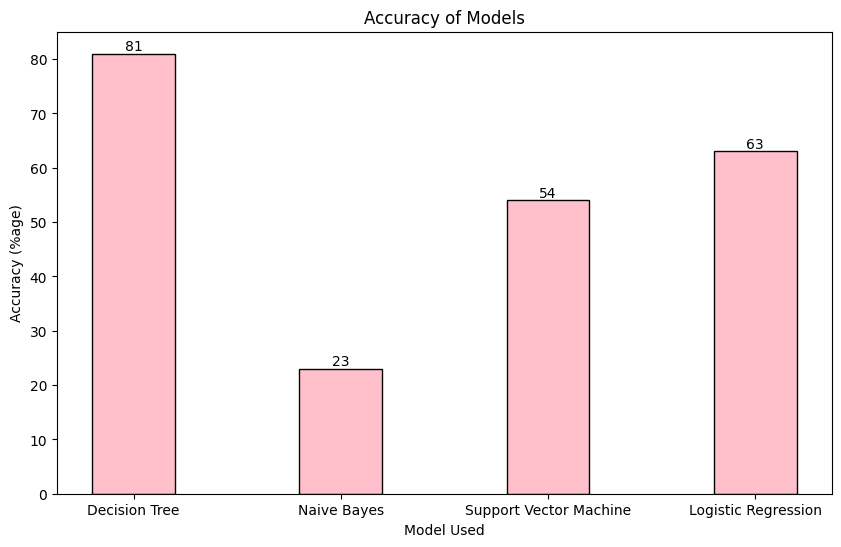

In [ ]:
import matplotlib.pyplot as plt
categories = ['Decision Tree', 'Naive Bayes', 'Support Vector Machine', 'Logistic Regression']
values = [81, 23, 54, 63]
plt.figure(figsize=(10, 6))
bars=plt.bar(categories, values, color='pink', edgecolor='black', width=0.4)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.xlabel('Model Used')
plt.ylabel('Accuracy (%age)')
plt.title('Accuracy of Models')
plt.show()